# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

636

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
response = requests.get(query_url+"princeton").json()

# Test the response
response

{'coord': {'lon': -74.66, 'lat': 40.35},
 'weather': [{'id': 500,
   'main': 'Rain',
   'description': 'light rain',
   'icon': '10d'},
  {'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50d'}],
 'base': 'stations',
 'main': {'temp': 46.24,
  'feels_like': 43.47,
  'temp_min': 43,
  'temp_max': 51.01,
  'pressure': 1005,
  'humidity': 100},
 'visibility': 1207,
 'wind': {'speed': 3.36, 'deg': 150},
 'rain': {'1h': 0.25},
 'clouds': {'all': 90},
 'dt': 1578141127,
 'sys': {'type': 1,
  'id': 6267,
  'country': 'US',
  'sunrise': 1578140501,
  'sunset': 1578174285},
 'timezone': -18000,
 'id': 5102922,
 'name': 'Princeton',
 'cod': 200}

In [4]:
 
counter=1
term=0
result=[]

print("Beginning Data Retrieval")
print("-----------------------------")

for i in range(len(cities)):
    weather_response=requests.get(query_url+cities[i])
    if weather_response.ok:
        print(f"Processing Record {counter%50} of Set {(term//50)+1}  |  {cities[i]}")
        counter=counter+1
        term=term+1
        result.append(weather_response.json())
    else:
        print("City not found. Skipping...")
        counter=counter
        term=term
print("-------------------------------")
print("Data Retrieval Complete")
print("-------------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1  |  constitucion
Processing Record 2 of Set 1  |  punta arenas
Processing Record 3 of Set 1  |  phuket
Processing Record 4 of Set 1  |  teya
Processing Record 5 of Set 1  |  rikitea
Processing Record 6 of Set 1  |  butaritari
Processing Record 7 of Set 1  |  ilulissat
Processing Record 8 of Set 1  |  savannah bight
Processing Record 9 of Set 1  |  kutum
Processing Record 10 of Set 1  |  khatanga
Processing Record 11 of Set 1  |  fortuna
Processing Record 12 of Set 1  |  sorgun
Processing Record 13 of Set 1  |  mataura
Processing Record 14 of Set 1  |  lata
Processing Record 15 of Set 1  |  provideniya
Processing Record 16 of Set 1  |  nome
Processing Record 17 of Set 1  |  saint-louis
Processing Record 18 of Set 1  |  jinxiang
Processing Record 19 of Set 1  |  pueblo
Processing Record 20 of Set 1  |  smoky lake
Processing Record 21 of Set 1  |  cape town
City not found. Skipping...
Processing Record 22 

Processing Record 30 of Set 4  |  likasi
Processing Record 31 of Set 4  |  nadym
City not found. Skipping...
Processing Record 32 of Set 4  |  taltal
Processing Record 33 of Set 4  |  russell
Processing Record 34 of Set 4  |  fujieda
City not found. Skipping...
Processing Record 35 of Set 4  |  saskylakh
Processing Record 36 of Set 4  |  chokurdakh
Processing Record 37 of Set 4  |  klaksvik
City not found. Skipping...
Processing Record 38 of Set 4  |  nioro
Processing Record 39 of Set 4  |  san borja
Processing Record 40 of Set 4  |  petropavlovsk-kamchatskiy
Processing Record 41 of Set 4  |  carbonia
Processing Record 42 of Set 4  |  namibe
Processing Record 43 of Set 4  |  nuevo progreso
Processing Record 44 of Set 4  |  russkaya polyana
Processing Record 45 of Set 4  |  sobolevo
Processing Record 46 of Set 4  |  tomatlan
Processing Record 47 of Set 4  |  hofn
Processing Record 48 of Set 4  |  grand forks
Processing Record 49 of Set 4  |  muncar
Processing Record 0 of Set 4  |  salal

Processing Record 5 of Set 8  |  khasan
Processing Record 6 of Set 8  |  eckernforde
Processing Record 7 of Set 8  |  basco
Processing Record 8 of Set 8  |  acevedo
Processing Record 9 of Set 8  |  virginia beach
City not found. Skipping...
Processing Record 10 of Set 8  |  tigil
Processing Record 11 of Set 8  |  isangel
Processing Record 12 of Set 8  |  half moon bay
Processing Record 13 of Set 8  |  hongjiang
Processing Record 14 of Set 8  |  lamu
Processing Record 15 of Set 8  |  lavrentiya
Processing Record 16 of Set 8  |  siguiri
Processing Record 17 of Set 8  |  kaili
Processing Record 18 of Set 8  |  yaan
Processing Record 19 of Set 8  |  weligama
Processing Record 20 of Set 8  |  baghdad
Processing Record 21 of Set 8  |  burnie
Processing Record 22 of Set 8  |  jaisinghnagar
Processing Record 23 of Set 8  |  port blair
City not found. Skipping...
City not found. Skipping...
Processing Record 24 of Set 8  |  henties bay
Processing Record 25 of Set 8  |  juneau
Processing Record 

Processing Record 28 of Set 11  |  cannes
Processing Record 29 of Set 11  |  lagos
Processing Record 30 of Set 11  |  camopi
Processing Record 31 of Set 11  |  shelburne
Processing Record 32 of Set 11  |  blagoyevo
Processing Record 33 of Set 11  |  san policarpo
Processing Record 34 of Set 11  |  luanda
City not found. Skipping...
Processing Record 35 of Set 11  |  aykhal
City not found. Skipping...
Processing Record 36 of Set 11  |  seoul
Processing Record 37 of Set 11  |  camaqua
Processing Record 38 of Set 11  |  rayadrug
Processing Record 39 of Set 11  |  mazamari
Processing Record 40 of Set 11  |  liwale
Processing Record 41 of Set 11  |  nizwa
Processing Record 42 of Set 11  |  alanya
Processing Record 43 of Set 11  |  rauma
Processing Record 44 of Set 11  |  autun
Processing Record 45 of Set 11  |  blackwater
Processing Record 46 of Set 11  |  tezu
Processing Record 47 of Set 11  |  goderich
Processing Record 48 of Set 11  |  lasa
Processing Record 49 of Set 11  |  perth
Proces

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
City=[]
Cloudiness=[]
Country=[]
Date=[]
Humidity=[]
Lat=[]
Lng=[]
Max_Temp=[]
Wind_Speed=[]

for item in range(len(result)):
    City.append(result[item]['name'])
    Cloudiness.append(result[item]['clouds']['all'])
    Country.append(result[item]['sys']['country'])
    Date.append(result[item]['dt'])
    Humidity.append(result[item]['main']['humidity'])
    Lat.append(result[item]['coord']['lat'])
    Lng.append(result[item]['coord']['lon'])
    Max_Temp.append(result[item]['main']['temp_max'])
    Wind_Speed.append(result[item]['wind']['speed'])
weather_df=pd.DataFrame(list(zip(City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed)),
                                columns=['City','Cloudiness','Country','Date','Humidity','Lat','Lng','Max_Temp','Wind_Speed'])
weather_df.count()



City          565
Cloudiness    565
Country       565
Date          565
Humidity      565
Lat           565
Lng           565
Max_Temp      565
Wind_Speed    565
dtype: int64

In [6]:
export_csv=weather_df.to_csv(r'../output_data/cities.csv',index=None,header=True)

weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
0,Constitucion,5,MX,1578141387,85,23.99,-104.67,35.01,4.70
1,Punta Arenas,40,CL,1578141387,66,-53.16,-70.91,51.80,13.87
2,Phuket,20,TH,1578141384,69,7.89,98.40,82.40,5.82
3,Teya,75,MX,1578141387,94,21.05,-89.07,73.99,3.36
4,Rikitea,100,PF,1578141387,82,-23.12,-134.97,77.65,15.48


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

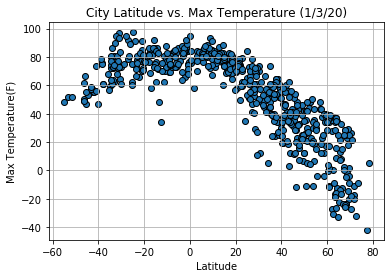

In [7]:
plt.scatter(x=weather_df['Lat'],y=weather_df['Max_Temp'],marker="o",edgecolors="black")
plt.grid()
plt.title("City Latitude vs. Max Temperature (1/3/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")
plt.savefig("../output_data/Latitudevs.temperatureplt.png")
plt.show()

Analysis
The graph is showing relationship between city latitude and max temperature.There is no dramatic increase from latitude -60 to 0, but it continously drops as latitude goes north. cities with highest max temperature are around latitude 0.

#### Latitude vs. Humidity Plot

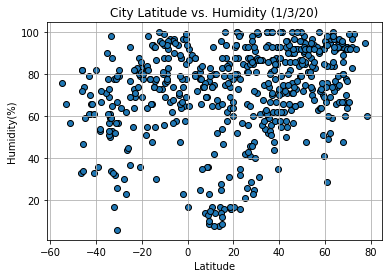

In [8]:
plt.scatter(x=weather_df['Lat'],y=weather_df['Humidity'],marker='o',edgecolor='black')
plt.grid()
plt.title("City Latitude vs. Humidity (1/3/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.savefig("../output_data/Latvs.Humidity.png")
plt.show()

Analysis
The graph is showing relationship between city latitude and humidity.Cities in south hemisphere have scattered data. In North hemisphere, there are more cities that has high humidity compared to south hemisphere.

#### Latitude vs. Cloudiness Plot

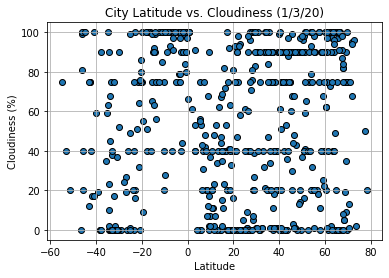

In [9]:
plt.scatter(x=weather_df['Lat'],y=weather_df['Cloudiness'],marker='o',edgecolors='black')
plt.grid()
plt.title("City Latitude vs. Cloudiness (1/3/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("../output_data/citylatitudevs.cloudiness.png")
plt.show()

Analysis
The graph is showing relationship between city latitude and cloudiness.There is no significant effect of city latitude on cloudiness.

#### Latitude vs. Wind Speed Plot

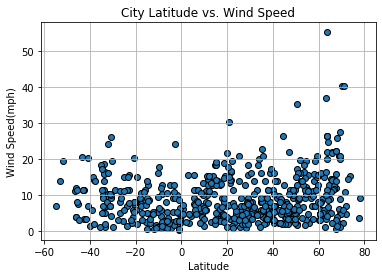

In [10]:
plt.scatter(x=weather_df['Lat'],y=weather_df['Wind_Speed'],marker='o',edgecolor='black')
plt.grid()
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.savefig("../output_data/citylatitudevs.windspeed.png")
plt.show()

Analysis
The graph is showing relationship between city latitude and wind speed. There are more cities in northhenisphere that have recordable wind speed. Also, there are small increase in higher wind speed as well in north henisphere.

## Linear Regression

In [11]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere=weather_df.loc[weather_df["Lat"]>=0]
northern_hemisphere.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
0,Constitucion,5,MX,1578141387,85,23.99,-104.67,35.01,4.70
2,Phuket,20,TH,1578141384,69,7.89,98.40,82.40,5.82
3,Teya,75,MX,1578141387,94,21.05,-89.07,73.99,3.36
5,Butaritari,53,KI,1578141387,80,3.07,172.79,84.29,15.50
6,Ilulissat,90,GL,1578141388,78,69.22,-51.10,17.60,5.82


In [12]:
southern_hemisphere=weather_df.loc[weather_df["Lat"]<0]
southern_hemisphere.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
1,Punta Arenas,40,CL,1578141387,66,-53.16,-70.91,51.80,13.87
4,Rikitea,100,PF,1578141387,82,-23.12,-134.97,77.65,15.48
12,Mataura,81,NZ,1578141388,82,-46.19,168.86,48.99,4.00
20,Cape Town,45,ZA,1578141197,61,-33.93,18.42,80.01,11.41
21,Hobart,75,AU,1578141225,61,-42.88,147.33,57.20,11.41


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8586972068786284


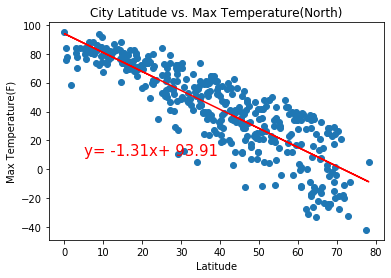

In [13]:
x_values=northern_hemisphere['Lat']
y_values=northern_hemisphere['Max_Temp']
(slope,intercept,rvalue,pvalue,stderr)=linregress(x_values,y_values)
regress_values=x_values*slope+intercept
line_eq="y= "+str(round(slope,2))+"x+ " + str(round(intercept,2))

plt.scatter(x=x_values,y=y_values)
plt.plot(x_values,regress_values,"red")
plt.annotate(line_eq,(5,10),fontsize=15,color="red")
plt.title("City Latitude vs. Max Temperature(North)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")
print(f'The r-squared is: {rvalue}')
plt.savefig("../output_data/maxtempvs.latitude(north).png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4766805693490556


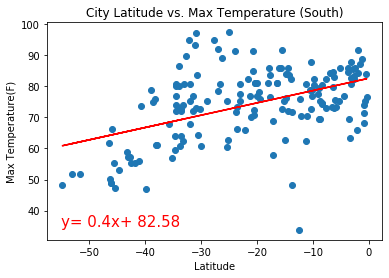

In [14]:
x_values=southern_hemisphere['Lat']
y_values=southern_hemisphere['Max_Temp']
(slope,intercept,rvalue,pvalue,stderr)=linregress(x_values,y_values)
regress_values=x_values*slope+intercept
line_eq="y= "+str(round(slope,2))+"x+ " + str(round(intercept,2))

plt.scatter(x=x_values,y=y_values)
plt.plot(x_values,regress_values,"red")
plt.annotate(line_eq,(-55,35),fontsize=15,color="red")
plt.title("City Latitude vs. Max Temperature (South)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")
print(f'The r-squared is: {rvalue}')
plt.savefig("../output_data/maxtempvs.latitude(south).png")



Analysis (City Latitude vs. Max Temperature Linear Regression)
The  two graphs is showing relationship between city latitude and max temperature in north hemisphere and south hemisphere.Both graphs indicate that there are drop or increase of tempearture as it moves away from equator. The linear line in north hemisphere is more steeper than graph in south hemisphere.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.38276221065417587


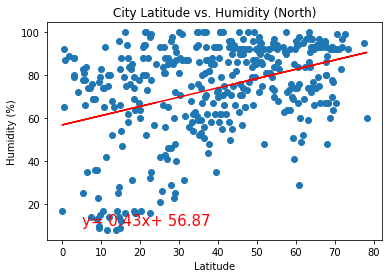

In [15]:
x_values=northern_hemisphere['Lat']
y_values=northern_hemisphere['Humidity']
(slope,intercept,rvalue,pvalue,stderr)=linregress(x_values,y_values)
regress_values=x_values*slope+intercept
line_eq="y= "+str(round(slope,2))+"x+ " + str(round(intercept,2))

plt.scatter(x=x_values,y=y_values)
plt.plot(x_values,regress_values,"red")
plt.annotate(line_eq,(5,10),fontsize=15,color="red")
plt.title("City Latitude vs. Humidity (North)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f'The r-squared is: {rvalue}')
plt.savefig("../output_data/latitudevs.humidity(north).png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.38594815340615635


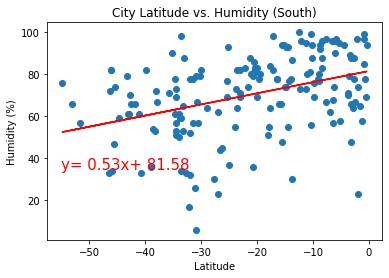

In [16]:
x_values=southern_hemisphere['Lat']
y_values=southern_hemisphere['Humidity']
(slope,intercept,rvalue,pvalue,stderr)=linregress(x_values,y_values)
regress_values=x_values*slope+intercept
line_eq="y= "+str(round(slope,2))+"x+ " + str(round(intercept,2))

plt.scatter(x=x_values,y=y_values)
plt.plot(x_values,regress_values,"red")
plt.annotate(line_eq,(-55,35),fontsize=15,color="red")
plt.title("City Latitude vs. Humidity (South)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f'The r-squared is: {rvalue}')
plt.savefig("../output_data/latitudevs.humidity(south).png")

Analysis ( City Latitude vs.Humidity Linear Regression)
The  two graphs is showing relationship between city latitude and humidity in north hemisphere and south hemisphere.Both graphs indicate that there are increase or decrease of humidity as it moves away from equator. The humidity change is smiliar, it is occuring in opposite direction. Humidityin north hemisphere is increasing as it moves away from equator. Humidity in south hemisphereis decreasing as it moves away from equator.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.22661647402063195


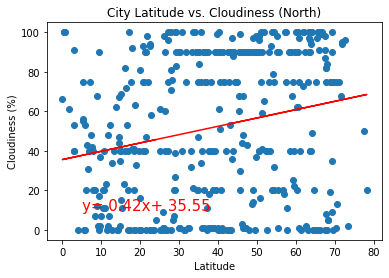

In [17]:
x_values=northern_hemisphere['Lat']
y_values=northern_hemisphere['Cloudiness']
(slope,intercept,rvalue,pvalue,stderr)=linregress(x_values,y_values)
regress_values=x_values*slope+intercept
line_eq="y= "+str(round(slope,2))+"x+ " + str(round(intercept,2))

plt.scatter(x=x_values,y=y_values)
plt.plot(x_values,regress_values,"red")
plt.annotate(line_eq,(5,10),fontsize=15,color="red")
plt.title("City Latitude vs. Cloudiness (North)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f'The r-squared is: {rvalue}')
plt.savefig("../output_data/latitudevs.cloudiness(north).png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.5230339452348222


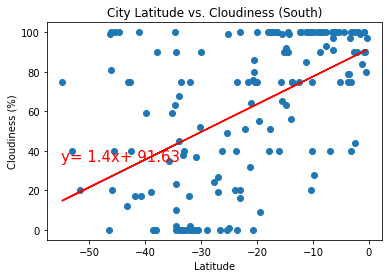

In [18]:
x_values=southern_hemisphere['Lat']
y_values=southern_hemisphere['Cloudiness']
(slope,intercept,rvalue,pvalue,stderr)=linregress(x_values,y_values)
regress_values=x_values*slope+intercept
line_eq="y= "+str(round(slope,2))+"x+ " + str(round(intercept,2))

plt.scatter(x=x_values,y=y_values)
plt.plot(x_values,regress_values,"red")
plt.annotate(line_eq,(-55,35),fontsize=15,color="red")
plt.title("City Latitude vs. Cloudiness (South)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f'The r-squared is: {rvalue}')
plt.savefig("../output_data/latitudevs.cloudiness(south).png")

Analysis ( City Latitude vs.Cloudiness Linear Regression)
The  two graphs is showing relationship between city latitude and cloudiness in north hemisphere and south hemisphere.Both graphs indicate that there are increase or decrease of cloudiness as it moves away from equator. The cloudiness change is minial in northhemisphere, but it is steeper change in south hemisphere. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.19796660774332125


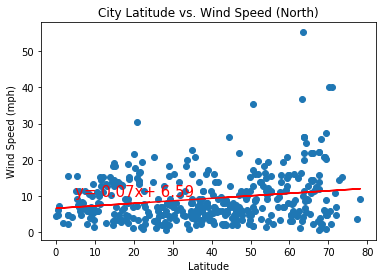

In [19]:
x_values=northern_hemisphere['Lat']
y_values=northern_hemisphere['Wind_Speed']
(slope,intercept,rvalue,pvalue,stderr)=linregress(x_values,y_values)
regress_values=x_values*slope+intercept
line_eq="y= "+str(round(slope,2))+"x+ " + str(round(intercept,2))

plt.scatter(x=x_values,y=y_values)
plt.plot(x_values,regress_values,"red")
plt.annotate(line_eq,(5,10),fontsize=15,color="red")
plt.title("City Latitude vs. Wind Speed (North)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print(f'The r-squared is: {rvalue}')
plt.savefig("../output_data/latitudevs.windspeed(north).png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.33390246902887816


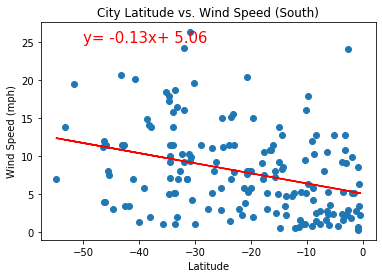

In [21]:
x_values=southern_hemisphere['Lat']
y_values=southern_hemisphere['Wind_Speed']
(slope,intercept,rvalue,pvalue,stderr)=linregress(x_values,y_values)
regress_values=x_values*slope+intercept
line_eq="y= "+str(round(slope,2))+"x+ " + str(round(intercept,2))

plt.scatter(x=x_values,y=y_values)
plt.plot(x_values,regress_values,"red")
plt.annotate(line_eq,(-50,25),fontsize=15,color="red")
plt.title("City Latitude vs. Wind Speed (South)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print(f'The r-squared is: {rvalue}')
plt.savefig("../output_data/latitudevs.windspeed(south).png")

Analysis ( City Latitude vs.Wind Speed Linear Regression)
The  two graphs is showing relationship between city latitude and wind speed in north hemisphere and south hemisphere.Both graphs indicate that there are minimal change as it moves away from equator.